<a href="https://colab.research.google.com/github/CyberBantu/Atlas_intel/blob/main/Analise_AtlasIntel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise Teste AtlasIntel

##### Importando Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### ANalise Exploratoria

Parte 1 --> Evolução Primeira Tabela
1. Faça um gráfico que represente a evolução das das respostas durante este ano
2. O que você pode concluir sobre a aprovação (e respectivamente, deseproação) desse candidato?

Parte 2 --> Respondentes
1. O que você pode concluir sobre as variaveis de Renda Mensal e Idade dos respondentes ( dica: Calcular os diferentes momentos da variavel, mediana, média, quartis)
2. Qual a porcentagem de Homen entre os respondentes? QUal a porcentagem de Mulheres?
3. Qual a porcentagem de solteiros entre os respondem?
4. Segundo o IBGE, a População brsileira é composta por 43%  de brancos. Baseado nesse dados o que voce conclui sobre a representatividade da nossa amosstra olhando para raça?


--> Importando dados

In [3]:
df_temporal = pd.read_excel('tarefa_atlas_intel.xlsx', sheet_name = 1)
df_temporal.head()

,Unnamed: 0,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30,2022-12-31
0,Approve,33.0,33.3,33.9,34.6,33.6,34.1,33.3,32.6,31.8,...,43.6,43.2,44.1,44.0,43.2,44.2,43.7,43.8,43.3,43.3
1,Disapprove,61.9,61.5,61.0,61.0,61.7,60.6,62.1,63.0,64.0,...,55.4,55.9,54.9,55.1,55.7,54.7,55.3,55.4,55.7,55.3
2,Don't know,5.2,5.2,5.2,4.4,4.7,5.3,4.6,4.4,4.2,...,1.0,0.8,1.1,0.9,1.0,1.1,1.0,0.8,1.0,1.4


* Analise 1

In [4]:
# Transpondo os dados
df_temporal = df_temporal.T

df_temporal.head()

,0,1,2
Unnamed: 0,Approve,Disapprove,Don't know
2022-01-01,33.0,61.9,5.2
2022-01-02,33.3,61.5,5.2
2022-01-03,33.9,61.0,5.2
2022-01-04,34.6,61.0,4.4


In [5]:
# Trocando o indice das colunas
df_temporal = df_temporal.set_axis(df_temporal.iloc[0], axis=1).iloc[1:]
df_temporal.head()

Unnamed: 0,Approve,Disapprove,Don't know
2022-01-01,33.0,61.9,5.2
2022-01-02,33.3,61.5,5.2
2022-01-03,33.9,61.0,5.2
2022-01-04,34.6,61.0,4.4
2022-01-05,33.6,61.7,4.7


In [6]:
# olhando as colunas por que entes não cnseguia captura o nome da primeira coluna
df_temporal.reset_index().columns

Index(['index', 'Approve', 'Disapprove', 'Don't know'], dtype='object', name='Unnamed: 0')

In [7]:
df_temporal.reset_index().name = 'Data'
df_temporal.columns

Index(['Approve', 'Disapprove', 'Don't know'], dtype='object', name='Unnamed: 0')

In [8]:
# Modificando o nome das colunas
# Utilizei o reset index pra poder tirar o nome do indice
df_temporal = df_temporal.reset_index().rename( columns = {
    'index' : 'Data',
    'Approve' : 'aprovacao',
    'Disapprove' : 'desaprovacao',
    "Don't know" : 'nao_sabe'
})
df_temporal

Unnamed: 0,Data,aprovacao,desaprovacao,nao_sabe
0,2022-01-01,33.0,61.9,5.2
1,2022-01-02,33.3,61.5,5.2
2,2022-01-03,33.9,61.0,5.2
3,2022-01-04,34.6,61.0,4.4
4,2022-01-05,33.6,61.7,4.7
...,...,...,...,...
360,2022-12-27,44.2,54.7,1.1
361,2022-12-28,43.7,55.3,1.0
362,2022-12-29,43.8,55.4,0.8
363,2022-12-30,43.3,55.7,1.0


* Analisando os dados

In [9]:
# Tipos de Dados
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Data          365 non-null    object
 1   aprovacao     365 non-null    object
 2   desaprovacao  365 non-null    object
 3   nao_sabe      365 non-null    object
dtypes: object(4)
memory usage: 11.5+ KB


In [10]:
# Transformando data em tipo data
df_temporal['Data'] = pd.to_datetime(df_temporal['Data'])
df_temporal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   aprovacao     365 non-null    object        
 2   desaprovacao  365 non-null    object        
 3   nao_sabe      365 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 11.5+ KB


In [11]:
df_temporal.head()

Unnamed: 0,Data,aprovacao,desaprovacao,nao_sabe
0,2022-01-01,33.0,61.9,5.2
1,2022-01-02,33.3,61.5,5.2
2,2022-01-03,33.9,61.0,5.2
3,2022-01-04,34.6,61.0,4.4
4,2022-01-05,33.6,61.7,4.7


In [12]:
# transformando as outras colunas , aprovação desaprovação e não sabe
df_temporal['aprovacao'] = pd.to_numeric(df_temporal['aprovacao'])
df_temporal['desaprovacao'] = pd.to_numeric(df_temporal['desaprovacao'])
df_temporal['nao_sabe'] = pd.to_numeric(df_temporal['nao_sabe'])

In [13]:
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   aprovacao     365 non-null    float64       
 2   desaprovacao  365 non-null    float64       
 3   nao_sabe      365 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


In [14]:
df_temporal.head()

Unnamed: 0,Data,aprovacao,desaprovacao,nao_sabe
0,2022-01-01,33.0,61.9,5.2
1,2022-01-02,33.3,61.5,5.2
2,2022-01-03,33.9,61.0,5.2
3,2022-01-04,34.6,61.0,4.4
4,2022-01-05,33.6,61.7,4.7


* Finalizei os tratamentos iniciais por aqui

---> Pegando informações de Dia e mês

In [15]:
df_temporal['dia'] = df_temporal['Data'].dt.day # Dia
df_temporal['mes'] = df_temporal['Data'].dt.month # mes
df_temporal['semana'] = df_temporal['Data'].dt.week # semana
df_temporal['trimeste'] = df_temporal['Data'].dt.quarter # trimestre


df_temporal.head()

<ipython-input-15-91e94304f053>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_temporal['semana'] = df_temporal['Data'].dt.week # semana


Unnamed: 0,Data,aprovacao,desaprovacao,nao_sabe,dia,mes,semana,trimeste
0,2022-01-01,33.0,61.9,5.2,1,1,52,1
1,2022-01-02,33.3,61.5,5.2,2,1,52,1
2,2022-01-03,33.9,61.0,5.2,3,1,1,1
3,2022-01-04,34.6,61.0,4.4,4,1,1,1
4,2022-01-05,33.6,61.7,4.7,5,1,1,1


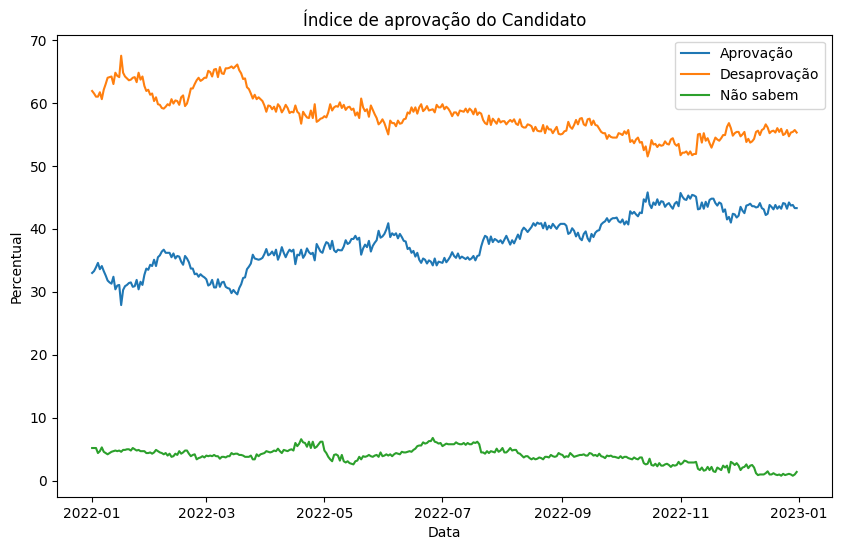

In [16]:
# pltando o grafico temporal com cada um dos dias
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(df_temporal['Data'], df_temporal['aprovacao'], label='Aprovação')
plt.plot(df_temporal['Data'], df_temporal['desaprovacao'], label='Desaprovação')
plt.plot(df_temporal['Data'], df_temporal['nao_sabe'], label='Não sabem')
plt.xlabel('Data')
plt.ylabel('Percentual')
plt.title('Índice de aprovação do Candidato')
plt.legend()
plt.show()

Agrupando media por Mês

In [17]:
# Fazendo agrupamento por Mes
agp_mes = df_temporal.groupby('mes')['aprovacao', 'desaprovacao', 'nao_sabe'].mean().reset_index()
agp_mes.head()

<ipython-input-17-5f41daaa9742>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agp_mes = df_temporal.groupby('mes')['aprovacao', 'desaprovacao', 'nao_sabe'].mean().reset_index()


Unnamed: 0,mes,aprovacao,desaprovacao,nao_sabe
0,1,31.996774,63.261290,4.764516
1,2,34.728571,61.039286,4.221429
2,3,32.303226,63.729032,3.964516
3,4,36.166667,58.550000,5.303333
4,5,37.619355,58.719355,3.661290


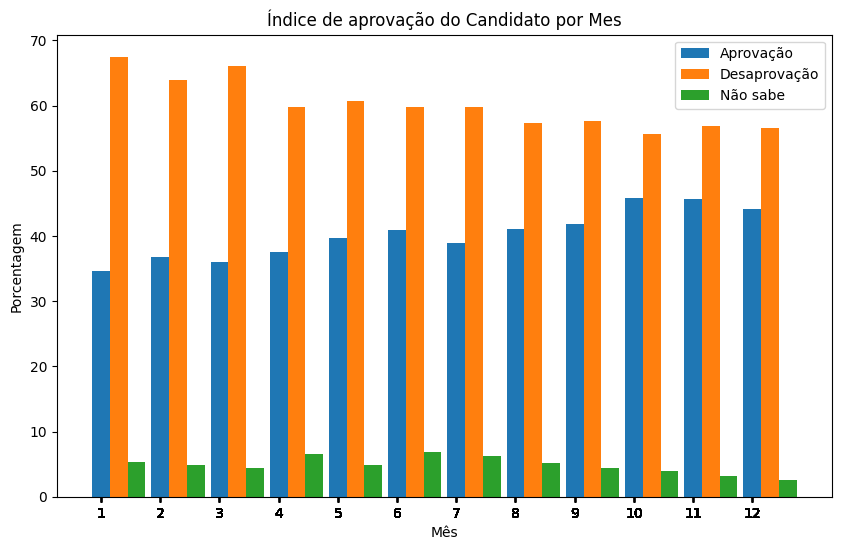

In [18]:
# Plotando o grafico de barra
# Separando as variveis
mes = df_temporal['mes']
aprovacao = df_temporal['aprovacao']
desaprovacao = df_temporal['desaprovacao']
nao_sabe = df_temporal['nao_sabe']

# Grafico
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(mes, aprovacao, 0.3, label='Aprovação')
ax.bar(mes + 0.3, desaprovacao, 0.3, label='Desaprovação')
ax.bar(mes + 0.3*2, nao_sabe, 0.3, label='Não sabe') # isso cria um efeito de sobreposição no grafico
ax.set_xticks(mes)


ax.set_title('Índice de aprovação do Candidato por Mes')
ax.set_xlabel('Mês')
ax.set_ylabel('Porcentagem')
ax.legend()
plt.show()


* Aprovação por semana

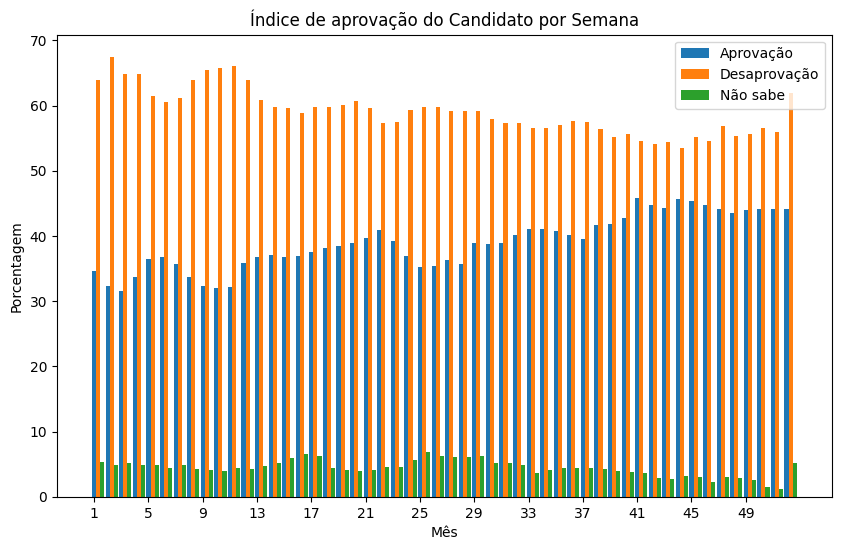

In [19]:
# Plotando o grafico de barra
# Separando as variveis
semana = df_temporal['semana']
aprovacao = df_temporal['aprovacao']
desaprovacao = df_temporal['desaprovacao']
nao_sabe = df_temporal['nao_sabe']

# Grafico
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(semana, aprovacao, 0.3, label='Aprovação')
ax.bar(semana + 0.3, desaprovacao, 0.3, label='Desaprovação')
ax.bar(semana + 0.3*2, nao_sabe, 0.3, label='Não sabe') # isso cria um efeito de sobreposição no grafico
ax.set_xticks(semana)
ax.set_xticks(range(1, 53, 4))


ax.set_title('Índice de aprovação do Candidato por Semana')
ax.set_xlabel('Mês')
ax.set_ylabel('Porcentagem')
ax.legend()
plt.show()

* Por Trimestre

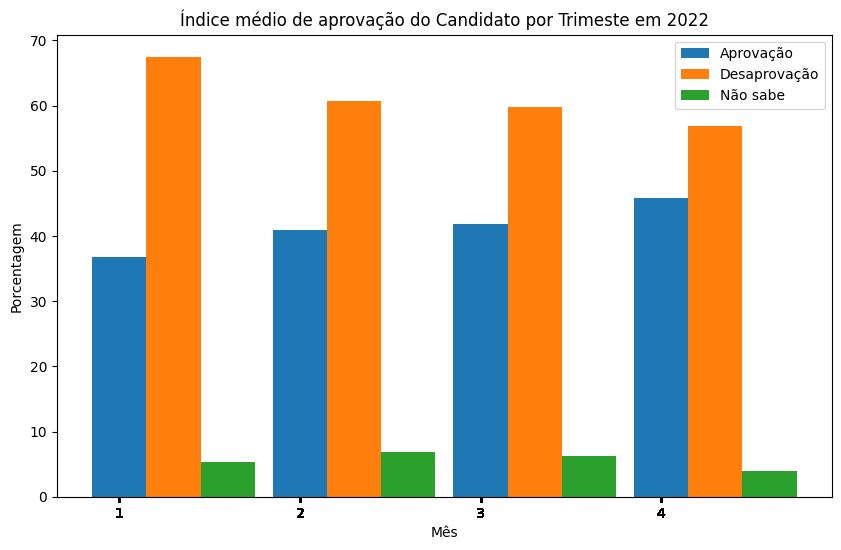

In [20]:
# Plotando o grafico de barra
# Separando as variveis
trimeste = df_temporal['trimeste']
aprovacao = df_temporal['aprovacao']
desaprovacao = df_temporal['desaprovacao']
nao_sabe = df_temporal['nao_sabe']

# Grafico
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(trimeste, aprovacao, 0.3, label='Aprovação')
ax.bar(trimeste + 0.3, desaprovacao, 0.3, label='Desaprovação')
ax.bar(trimeste + 0.3*2, nao_sabe, 0.3, label='Não sabe') # isso cria um efeito de sobreposição no grafico
ax.set_xticks(trimeste)

ax.set_title('Índice médio de aprovação do Candidato por Trimeste em 2022')
ax.set_xlabel('Mês')
ax.set_ylabel('Porcentagem')
ax.legend()
plt.show()

## Conclusão Tabela 1
Alguns pontos são observado nos dados e nos dão um panorama sobre o indice de aprovação do candidato - Observação dos dados por mês, semana e trimestre
1. Tendência de crescimento no índice de aprovação do candidato
2. Diminuição da taxa de desaprovação
3. A tendência de crescimento da aprovação cresce a partir do mês de Julho
4. Uma diminuição no ultimo trimeste da taxa de "Não sabe" que pode refletir no aumento da aprovação do canditado no mesmo período
5. Tendência de crescimento a partir da 25ª semana até o final do ano.

## Analise dos Dados na Segunda Planilha -- **Respondentes**

In [21]:
df_respondentes = pd.read_excel('tarefa_atlas_intel.xlsx', sheet_name = 2)
df_respondentes.head()

,User Id,Gênero,Idade,Renda Mensal,Raça,Estado Civil
0,1,Homem,22,6570,Parda,Solteiro
1,2,Homem,32,1239,Parda,Solteiro
2,3,Homem,37,7676,Branca,Casado
3,4,Homem,23,9893,Branca,Casado
4,5,Homem,19,8768,Branca,Casado


In [22]:
df_respondentes.shape # Contando o total de respondentes

(99, 6)

In [23]:
# Explorando os dados - os dados já estavam bem estruturados depois da exportação
df_respondentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User Id       99 non-null     int64 
 1   Gênero        99 non-null     object
 2   Idade         99 non-null     int64 
 3   Renda Mensal  99 non-null     int64 
 4   Raça          99 non-null     object
 5   Estado Civil  99 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


O que você pode concluir sobre as variaveis de Renda Mensal e Idade dos respondentes ( dica: Calcular os diferentes momentos da variavel, mediana, média, quartis)

In [24]:
# Calculando as variaveis renda mensal
media_renda = df_respondentes['Renda Mensal'].mean()
mediana_renda = df_respondentes['Renda Mensal'].median()

# Calculando as variaveis Idades
media_idade = df_respondentes['Idade'].mean()
mediana_idade = df_respondentes['Idade'].median()


print(f'A renda média dos respondentes é de R$ {round(media_renda,2)} e a Mediana é de R$ {round(mediana_renda,2)}')
#_---------------------------------------------------
print(f'A idade média dos respondentes é de {round(media_idade,2)} anos e a Mediana é de {round(mediana_idade,2)} anos')


A renda média dos respondentes é de R$ 6698.27 e a Mediana é de R$ 6964.0
A idade média dos respondentes é de 39.39 anos e a Mediana é de 38.0 anos


##### Idade

--> Para olhar para quartis irei plotar um boxplot para poder obter uma visualização das informações

In [25]:
df_respondentes['Idade'].describe()

count    99.000000
mean     39.393939
std      13.233244
min      18.000000
25%      29.000000
50%      38.000000
75%      51.500000
max      64.000000
Name: Idade, dtype: float64

Sobre a Idade Pode-se concluir que: 
1. As idades estão entre 18 e 64 anos
2. 50 % dos respondentes de até 38 anos
3. A média Geral é de 39 anos
4. Desvio Padrão de 13

###### Nos gráficos abaixo é possível visualizar estas informações, olhando para todos os respondentes e também separando por Gênero

<Axes: xlabel='Idade'>

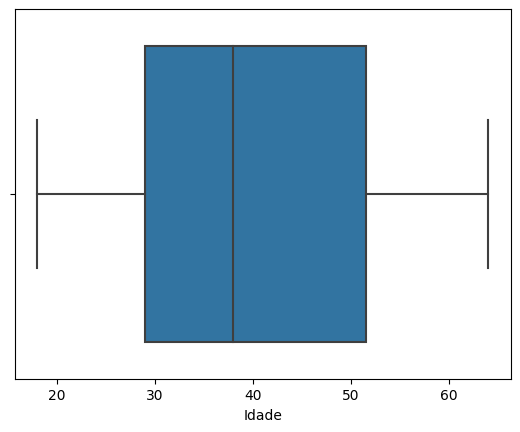

In [26]:
sns.boxplot(data = df_respondentes,
            x = 'Idade'
            )

Por Gênero

In [27]:
df_respondentes[df_respondentes['Gênero'] == 'Mulher'].describe()

,User Id,Idade,Renda Mensal
count,37.000000,37.000000,37.000000
mean,52.837838,42.027027,6835.432432
std,23.360120,11.603368,3249.134411
min,15.000000,21.000000,1727.000000
25%,44.000000,35.000000,3588.000000
50%,53.000000,41.000000,6964.000000
75%,65.000000,53.000000,8958.000000
max,99.000000,64.000000,12485.000000


In [28]:
df_respondentes[df_respondentes['Gênero'] == 'Homem'].describe()

,User Id,Idade,Renda Mensal
count,62.000000,62.000000,62.000000
mean,48.306452,37.822581,6616.419355
std,31.552500,13.970137,2885.150111
min,1.000000,18.000000,1231.000000
25%,24.250000,26.000000,4176.250000
50%,39.500000,35.500000,6930.500000
75%,79.750000,50.750000,8766.000000
max,95.000000,64.000000,11946.000000


<Axes: xlabel='Idade', ylabel='Gênero'>

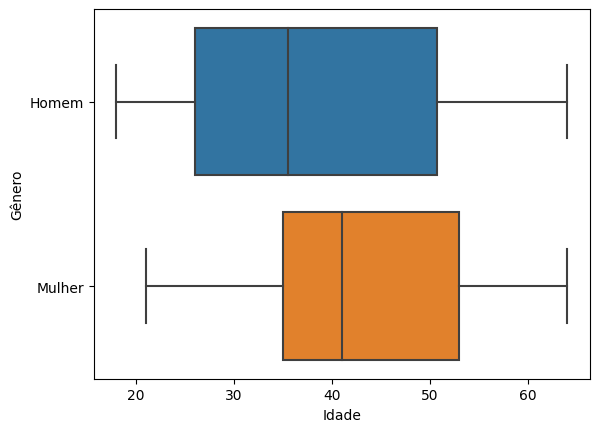

In [29]:
sns.boxplot(data = df_respondentes,
            x = 'Idade' , y = 'Gênero'
            )


1. Os Homens são o maior número de respondentes 
2. As mulheres respondentes possuem uma médiade idade maior porém possuem uma menor Amplitude de idade
3. 50 % das mulheres possuem idade menor que 41

Analisando raça por meio do boxplot

<Axes: xlabel='Idade', ylabel='Raça'>

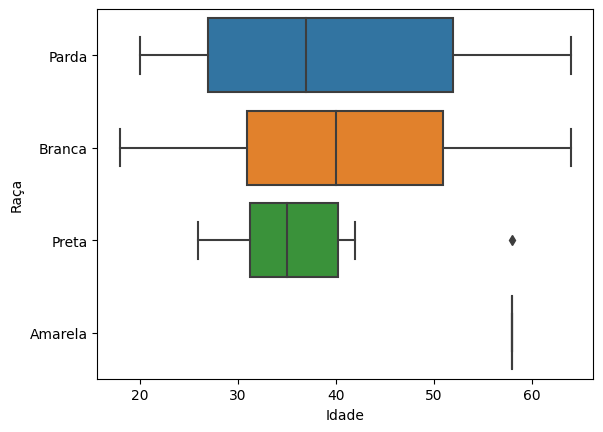

In [30]:
sns.boxplot(data = df_respondentes,
            x = 'Idade' , y = 'Raça'
            )


1. Há uma grande dipersão entre as idades de brancos e pardos porem, pouca dispersão e representatividade entre pretos e amarelos
2. Já nessa analise é possível observar não há uma representação total da população da maneira correta, já que brancos não são 63% da população e assim está represenado na amostra

In [43]:
# Olhando para porcentagem por
df_raca = df_respondentes['Raça'].value_counts(normalize = True) * 100
df_raca = df_raca.reset_index()
df_raca.head()

,index,Raça
0,Branca,63.636364
1,Parda,29.292929
2,Preta,6.060606
3,Amarela,1.010101


Text(0.5, 1.0, 'Porcentagem de Respondentes por Raça')

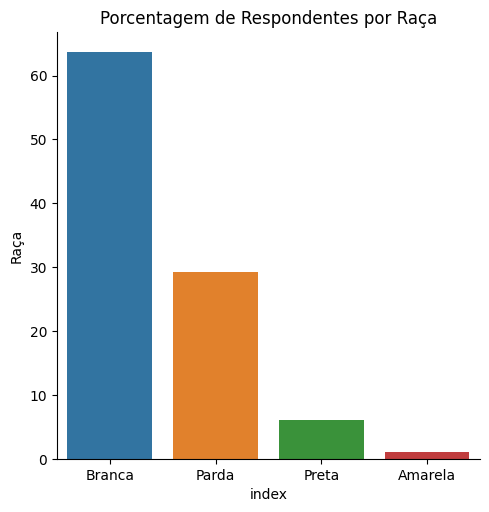

In [45]:
sns.catplot(data = df_raca, x = 'index', y = 'Raça', kind = 'bar')
plt.title('Porcentagem de Respondentes por Raça')

##### Renda

In [32]:
df_respondentes['Renda Mensal'].describe()

count       99.000000
mean      6698.272727
std       3011.760133
min       1231.000000
25%       4003.500000
50%       6964.000000
75%       8930.000000
max      12485.000000
Name: Renda Mensal, dtype: float64

1. Media de renda mensal dos respondentes é de 6698
2. 50 % dos respondentes tem renda menor de 6964
3. Renda maxima de 1231 e Renda Minima de 12485

<Axes: xlabel='Renda Mensal'>

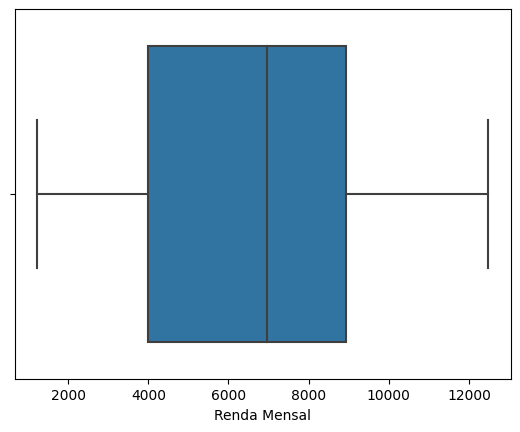

In [33]:
# Olhando para a renda dos respondentes
sns.boxplot(data = df_respondentes,
            x = 'Renda Mensal'
            )

In [34]:
df_respondentes[df_respondentes['Gênero'] == 'Mulher'].describe()

,User Id,Idade,Renda Mensal
count,37.000000,37.000000,37.000000
mean,52.837838,42.027027,6835.432432
std,23.360120,11.603368,3249.134411
min,15.000000,21.000000,1727.000000
25%,44.000000,35.000000,3588.000000
50%,53.000000,41.000000,6964.000000
75%,65.000000,53.000000,8958.000000
max,99.000000,64.000000,12485.000000


In [35]:
df_respondentes[df_respondentes['Gênero'] == 'Homem'].describe()

,User Id,Idade,Renda Mensal
count,62.000000,62.000000,62.000000
mean,48.306452,37.822581,6616.419355
std,31.552500,13.970137,2885.150111
min,1.000000,18.000000,1231.000000
25%,24.250000,26.000000,4176.250000
50%,39.500000,35.500000,6930.500000
75%,79.750000,50.750000,8766.000000
max,95.000000,64.000000,11946.000000


Diferença entre mulheres e Homens  

1. Mulheres
* Renda Mensal média = 6835
* 50 % das mulheres recebem menos de 6964
* São 37 das rspondnetes
* Valor Minimo de 1727 e Max de 12485 reais

2. Homens
* Renda Mensal Média = 6616
* 50 % dos Homens recebem menos de 6930 reais por mês
* São 62 dos Participantes
* Valor Minimo de 1231 e maximo de 11946

-------------------------------

Apesar de rendas similares, as respondentes mulheres tem rendas mensais maiores que os homens, porem matem uma mediana similar como é possível ver nos números acima e tambem no boxplot, com um diferença de R$ 34 reais

<Axes: xlabel='Renda Mensal', ylabel='Gênero'>

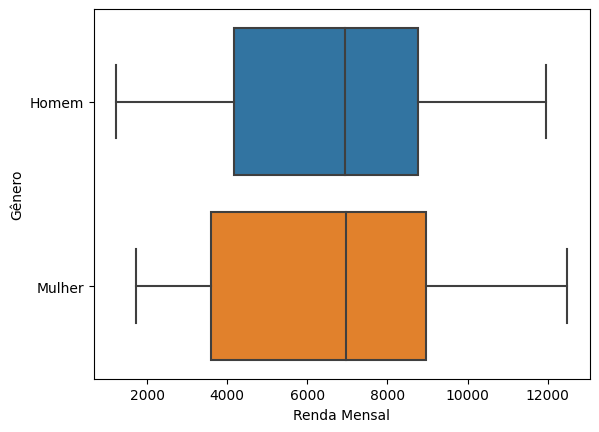

In [36]:
sns.boxplot(data = df_respondentes,
            x = 'Renda Mensal', 
            y = 'Gênero')

In [37]:
df_respondentes.head()

,User Id,Gênero,Idade,Renda Mensal,Raça,Estado Civil
0,1,Homem,22,6570,Parda,Solteiro
1,2,Homem,32,1239,Parda,Solteiro
2,3,Homem,37,7676,Branca,Casado
3,4,Homem,23,9893,Branca,Casado
4,5,Homem,19,8768,Branca,Casado


Analisando Raça e renda pelo Boxplot

<Axes: xlabel='Renda Mensal', ylabel='Raça'>

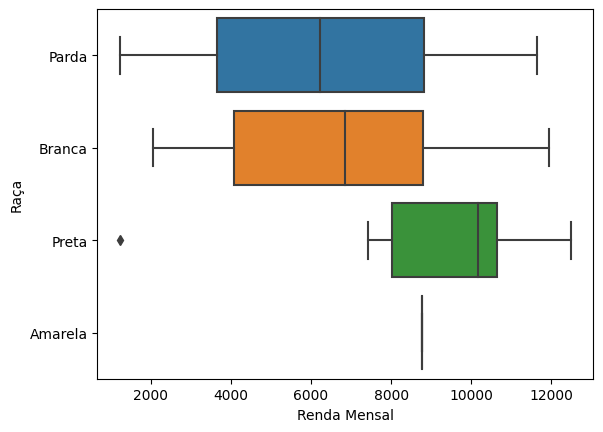

In [38]:
sns.boxplot(data = df_respondentes,
            x = 'Renda Mensal' , y = 'Raça'
            )

* Obsevando a raça e renda é possivel ver que pretos tem a faixa de renda mais deslocada ao topo, mesmo com um outlier com valor baixo
* A renda dos bracos e pardos possuem uma grande dispesar, sendo a mediana de pardos a menor

##### Cruzamentos de Dados

Calculando a media salaria por raça e genero

In [39]:
renda_genero_raca = df_respondentes.groupby(['Gênero', 'Raça'])['Renda Mensal'].mean().reset_index().sort_values(by = 'Renda Mensal', ascending = True)
renda_genero_raca.head()

,Gênero,Raça,Renda Mensal
5,Mulher,Parda,6178.666667
2,Homem,Parda,6224.750000
1,Homem,Branca,6591.833333
4,Mulher,Branca,6845.111111
3,Homem,Preta,7931.400000


Text(0.5, 1.0, 'Recorte de Genero e Raça para a Renda Dos Respondentes')

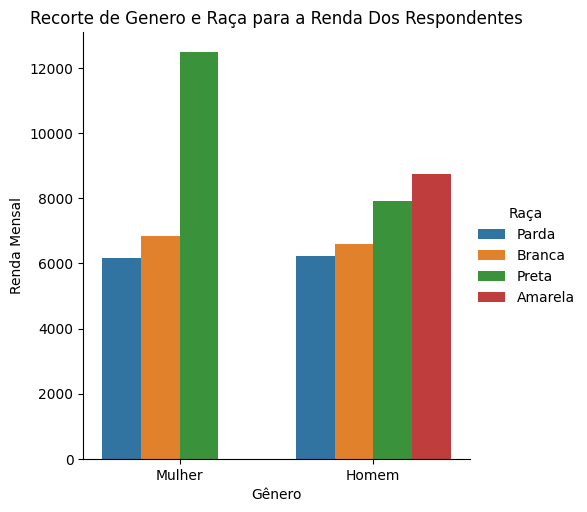

In [40]:
sns.catplot(data = renda_genero_raca,
            x = 'Gênero',
            y = 'Renda Mensal',
            hue = 'Raça', kind = 'bar')
plt.title('Recorte de Genero e Raça para a Renda Dos Respondentes')

Recorte raça e genero para idade

In [41]:
idade_genero_raca = df_respondentes.groupby(['Gênero', 'Raça'])['Idade'].mean().reset_index().sort_values(by = 'Idade', ascending = True)
idade_genero_raca.head()

,Gênero,Raça,Idade
6,Mulher,Preta,35.000000
1,Homem,Branca,36.944444
3,Homem,Preta,38.200000
2,Homem,Parda,38.300000
5,Mulher,Parda,39.555556


Text(0.5, 1.0, 'Recorte de Genero e Raça para a Idade Dos Respondentes')

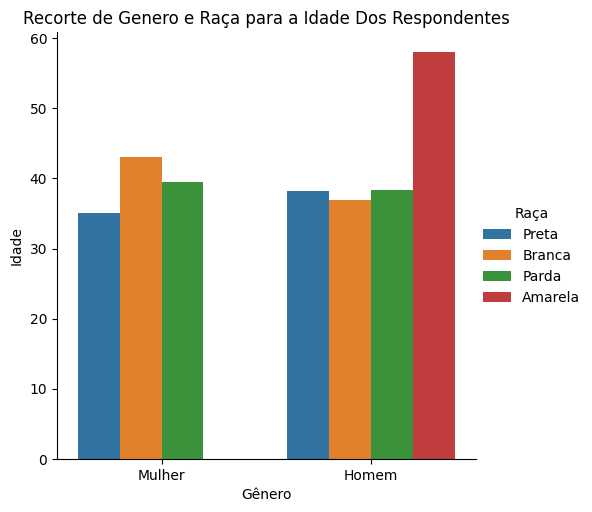

In [42]:
sns.catplot(data = idade_genero_raca,
            x = 'Gênero',
            y = 'Idade',
            hue = 'Raça', kind = 'bar')
plt.title('Recorte de Genero e Raça para a Idade Dos Respondentes')

In [47]:
df_respondentes.head()

,User Id,Gênero,Idade,Renda Mensal,Raça,Estado Civil
0,1,Homem,22,6570,Parda,Solteiro
1,2,Homem,32,1239,Parda,Solteiro
2,3,Homem,37,7676,Branca,Casado
3,4,Homem,23,9893,Branca,Casado
4,5,Homem,19,8768,Branca,Casado


In [57]:
# Genero Porcentagem
porc_gen = df_respondentes['Gênero'].value_counts(normalize = True) * 100
porc_gen = porc_gen.reset_index()

Text(13.819444444444445, 0.5, 'Porcentagem')

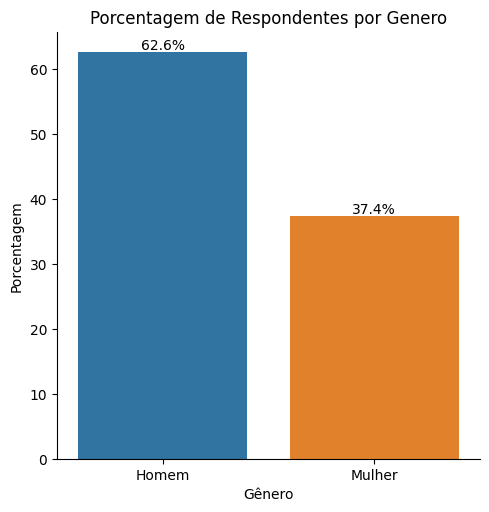

In [62]:
sns.catplot(data = porc_gen, 
            x = 'index', 
            y = 'Gênero', 
            kind = 'bar')
plt.title('Porcentagem de Respondentes por Genero')
for index, row in porc_gen.iterrows():
    plt.annotate(f"{row['Gênero']:.1f}%", (index, row['Gênero']), ha='center', va='bottom')
plt.xlabel('Gênero')
plt.ylabel('Porcentagem')

In [64]:
# Estado Civil porcentagem
est_civil_porc = df_respondentes['Estado Civil'].value_counts(normalize = True) * 100
est_civil_porc = est_civil_porc.reset_index()
est_civil_porc

,index,Estado Civil
0,Casado,78.787879
1,Solteiro,13.131313
2,Divorciado,5.050505
3,Separado,2.020202
4,Viúvo,1.010101


In [ ]:
for index, row in porc_gen.iterrows():
    plt.annotate(f"{row['Gênero']:.1f}%", (index, row['Gênero']), ha='center', va='bottom')
plt.xlabel('Gênero')
plt.ylabel('Porcentagem')

Text(13.819444444444445, 0.5, 'Porcentagem')

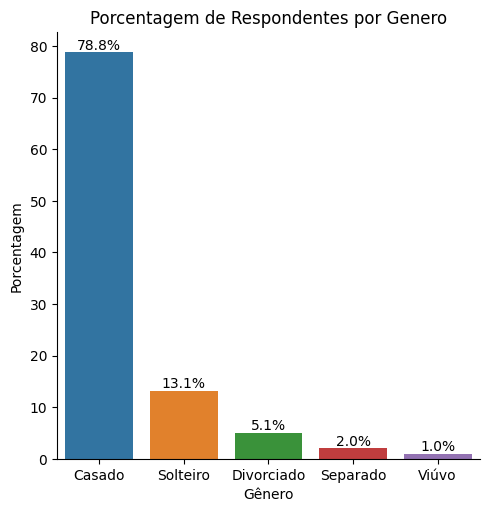

In [70]:
sns.catplot(data = est_civil_porc, 
            x = 'index', 
            y = 'Estado Civil', 
            kind = 'bar')
plt.title('Porcentagem de Respondentes por Genero')
for index, row in est_civil_porc.iterrows():
    plt.annotate(f"{row['Estado Civil']:.1f}%", (index, row['Estado Civil']), ha='center', va='bottom')
plt.xlabel('Gênero')
plt.ylabel('Porcentagem')